# Scenario Background
​
*The following case study was performed as part of the Google Data Analytics Proffessional Certificate. The scenario is described as such:*
> Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.
Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly
positioned itself as a tech-driven wellness company for women
​
>Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. 
These questions will guide your analysis:
>1. What are some trends in smart device usage?
>2. How could these trends apply to Bellabeat customers?
>3. How could these trends help influence Bellabeat marketing strategy?
​
>Sršen encourages you to use public data that explores smart device users’ daily habits. She points you to a specific data set:
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.
​
For this case study, I have elected to use Python rather than R programming, as it's something I feel a little bit more comfortable using. 
​
# Goals
​
My Goals for this project are to analyze the usage patterns of fitbit users and define patterns and trends, as well as observed benefits, of active users. The goals would be to develop a way encourage habitual use of health monitoring programs by providing users with informed feedback and ways they can improve health outcomes. We will look at these key factors
1. What defines a high activity user?
2. What health benefits are documented from being high activity?
3. What patterns of excercise and activity do high activity users engage in?
​

By documenting patterns of high activity users we can develop some sort of notification system designed as a "pathway to success" for users to encourage their habitual use of healthcare monitoring software. 
​

# Designing a model for categorization.
## 1. Set up.
The first thing we will look at is the daily activity log of fitbit users. We want to scrub the data set of null values, make sure that our columns are set up correctly, and get rid of any data that may not be useful. 

In [1]:
#import all libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib #make pretty graphs
import seaborn as sns #make more pretty graphs
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') #assign a basic design schema to graphs to keep things looking consistent
from matplotlib.pyplot import figure
#set parameters for graph rendering
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)


In [2]:
 #Ignore warnings if necessary
import warnings
warnings.filterwarnings('ignore')


In [3]:
#take a look at all available files provided in the dataset
import os
path = r"C:\Users\Madi\Documents\Fitabase Data 4.12.16-5.12.16"
for files in os.listdir(path):
    if os.path.isfile(os.path.join(path,files)):
        print(files) #print file names of all data found

dailyActivity_merged.csv
dailyCalories_merged.csv
dailyIntensities_merged.csv
dailySteps_merged.csv
GoogleCapstone.ipynb
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteCaloriesWide_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteIntensitiesWide_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
minuteStepsWide_merged.csv
sleepDay_merged.csv
weightLogInfo_merged.csv


In [4]:
df = pd.read_csv('dailyActivity_merged.csv') #read in our daily data, to use for categorization

In [5]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [6]:
print(df.Id.nunique())

33


The data set provides us with 33 unique users at the outset. Let's see if there are any inconsistencies in how they are logged. First we'll do a basic check for duplicate entries. 

In [7]:
df.drop_duplicates()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


After dropping duplicates we still have 940 rows. So it appears that there are no duplicates in the data set. Now lets check for missing or null values.

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Id - 0.0%
ActivityDate - 0.0%
TotalSteps - 0.0%
TotalDistance - 0.0%
TrackerDistance - 0.0%
LoggedActivitiesDistance - 0.0%
VeryActiveDistance - 0.0%
ModeratelyActiveDistance - 0.0%
LightActiveDistance - 0.0%
SedentaryActiveDistance - 0.0%
VeryActiveMinutes - 0.0%
FairlyActiveMinutes - 0.0%
LightlyActiveMinutes - 0.0%
SedentaryMinutes - 0.0%
Calories - 0.0%


There are no missing or null values in the data set, all the entries have at least some data in it. That doesn't mean it's all necessarily useful though, so we need to take a closer look at what it all looks like.  

In [9]:
def remove_outliers(data, cols):
    found_outliers = set()
    for col in cols:
        #find all the data needed to define outliers
        Q1 = data[col].quantile(0.25) #isolate the lowest quantile of data in a column
        Q3 = data[col].quantile(0.75) #isolate the highest quantile of data in a column

        iqr = Q3 - Q1 #find the interquartile range, the distance between the top quarter, and the bottom quarter of data points

        data_lowerlim = Q1 - 1.5 * iqr #define lower outliers as the lowest data points that are less than 1.5 times the interquartile range
        data_upperlim = Q3 + 1.5 * iqr #define higher outliers as the highest data points that are more than 1.5 times the interquartile range
        #remove outliers 
        outliers = data[(data[col] < data_lowerlim) | (data[col] > data_upperlim)]
        n_outliers = len(outliers)
        pct_outliers = n_outliers / len(data) * 100
        print(f"[INFO] Found {n_outliers} outliers ({pct_outliers:.2f}%) for {col}")
        found_outliers.update(outliers.index)
    data = data.drop(found_outliers).reset_index(drop=True)
    print(f"[INFO] Removed {len(found_outliers)} rows.")
    return data

In [10]:
dailyact_colnames = df.loc[:, 'TotalDistance':'TrackerDistance'].columns.values

In [11]:
df = remove_outliers(df, dailyact_colnames)

[INFO] Found 23 outliers (2.45%) for TotalDistance
[INFO] Found 23 outliers (2.45%) for TrackerDistance
[INFO] Removed 23 rows.


In [12]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,8877689391,5/5/2016,14055,10.67,10.67,0.0,5.46,0.82,4.37,0.0,67,15,188,1170,3052
913,8877689391,5/7/2016,12332,8.13,8.13,0.0,0.08,0.96,6.99,0.0,105,28,271,1036,4142
914,8877689391,5/8/2016,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.0,17,4,245,1174,2847
915,8877689391,5/10/2016,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.0,18,11,224,1187,2832


We have removed 23 rows for being distant outliers. We're removing the distant outliers simply to ease the process of categorization. Since we will be using average activity in order to determine user category.

In [13]:
df.Id.value_counts(ascending=True)

4057192912     4
8877689391    17
2347167796    18
8253242879    19
3372868164    20
8053475328    24
7007744171    26
6775888955    26
6117666160    28
8792009665    29
6290855005    29
4388161847    30
3977333714    30
5577150313    30
1644430081    30
1624580081    30
4702921684    31
7086361926    31
6962181067    31
2026352035    31
8583815059    31
1927972279    31
2873212765    31
1844505072    31
2022484408    31
4445114986    31
2320127002    31
1503960366    31
4020332650    31
4319703577    31
4558609924    31
8378563200    31
5553957443    31
Name: Id, dtype: int64

#### Making sure user data is useful.

It appears we have one user who only logged four out of thirty one possible entries. The other users have logged at least half of the 31 entries, so I'm willing to keep them. But let's remove the lowest user. 

In [14]:
df.drop(df[df['Id']==4057192912].index, inplace=True)

In [15]:
df.TotalSteps.describe()

count      913.000000
mean      7291.787514
std       4559.320287
min          0.000000
25%       3727.000000
50%       7289.000000
75%      10536.000000
max      22244.000000
Name: TotalSteps, dtype: float64

So this is definitely a problem in the dataset. Even on someone's most sedentary day you would expect them to take at least one step. If you lived in a small one bedroom apartment and only got up from your couch to grab food and go to the bathroom and to bed I would wager you would still take at least 50 steps. Let's remove the entries with less than this many steps, as it's likely the fitbit was simply in a desk drawer. 

In [16]:
df = df[df['TotalSteps']>50]

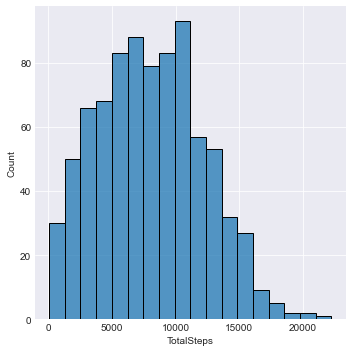

In [17]:
sns.displot(data=df, x='TotalSteps')

This seems like a reasonable distribution, not exactly a normal distribution, it's slightly skewed to the left, but it's fairly close to it. That lines up with my expectations relatively well. 

In [18]:
df['TotalSteps'].describe()

count      828.000000
mean      8040.099034
std       4111.196460
min         62.000000
25%       4928.250000
50%       7930.500000
75%      10773.250000
max      22244.000000
Name: TotalSteps, dtype: float64

We can see that the mean and the median are very close to each other, with a only little more than a hundred steps separating them. Confirming what we saw in the histogram, this is realtively close to a normal distribution. 

In [19]:
df.Id.value_counts(ascending=True)

6775888955    16
4020332650    16
2347167796    17
8877689391    17
1927972279    17
8253242879    18
1844505072    18
8792009665    19
3372868164    20
6117666160    23
8053475328    24
7007744171    24
6290855005    24
5577150313    28
4319703577    29
7086361926    29
1624580081    30
4388161847    30
3977333714    30
1503960366    30
4702921684    30
8583815059    30
1644430081    30
6962181067    31
2320127002    31
2026352035    31
8378563200    31
5553957443    31
4558609924    31
2022484408    31
2873212765    31
4445114986    31
Name: Id, dtype: int64

Even after dropping 0 step days, we are still left with 21 users who have logged at least 16 entries. I don't see any need to drop more of them. Since we'll be categorizing them based on their average activity. 

Now we can go through our data set and make sure all the columns are set to the correct values. And create a couple new columns to help us in our analysis. 

In [20]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [21]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate']) #ensure that our activity date is set to a pandas datetime object
df['DayOfTheWeek'] = df["ActivityDate"].dt.day_name() #create a column that tells us which day of the week activity was logged on
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


Now let's create a new column that shows us the total number of non-sedentary minutes a user logged during each day. 

In [22]:
df['TotalActiveMinutes'] =df.apply(lambda row: row.LightlyActiveMinutes + row.FairlyActiveMinutes + row.VeryActiveMinutes, axis=1)
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,8877689391,2016-05-05,14055,10.67,10.67,0.0,5.46,0.82,4.37,0.0,67,15,188,1170,3052,Thursday,270
913,8877689391,2016-05-07,12332,8.13,8.13,0.0,0.08,0.96,6.99,0.0,105,28,271,1036,4142,Saturday,404
914,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.0,17,4,245,1174,2847,Sunday,266
915,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.0,18,11,224,1187,2832,Tuesday,253


#### 2. Determining relevant factors to categorization

One of my goals is to define who is the "active" user, and what sets them apart. For the purposes of this analysis, we'll see what factors are most correlated with caloric burning. There are problems with this approach, but it seems like the best method for us continuing to proceed.

Text(0.5, 1.0, 'Correlation Matrix For FitBit Data')

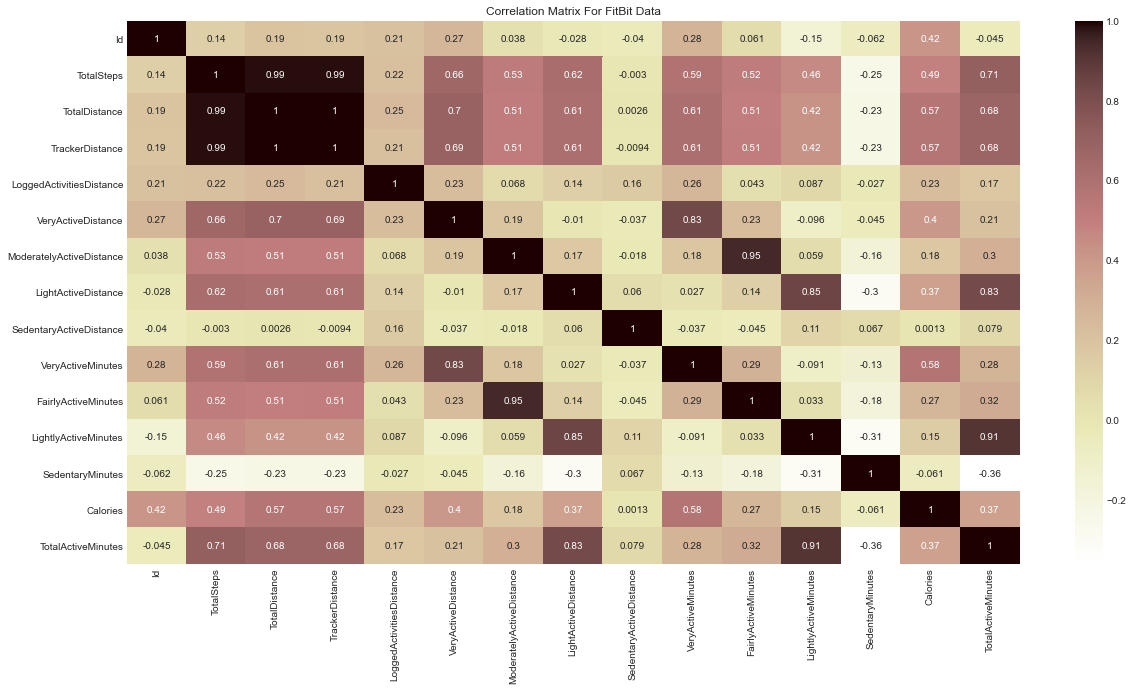

In [23]:
correlation_matrix = df.corr( method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap="pink_r")
plt.title("Correlation Matrix For FitBit Data")

In [24]:
print(df.Calories.corr(df.TotalDistance, method='pearson'))
print(df.Calories.corr(df.VeryActiveMinutes, method='pearson'))

0.5713677986947782
0.5765507163274157


There's a lot going on here, and this knocks more potential factors out than it does really highlight any. The two highest values we have to go off of are total distance and very active minutes. But these have a coefficient of .57 and .58, respectively. 

That's not very high. For a correlation of .57, that means that only 32% of the covariance is related. That means that both of these factors leave over 78% of variance unexplained. 

It's possible that using them in combination may produce something more meaningful however.

In [25]:
groupdf = df.groupby(by=['Id'], as_index=False).mean()

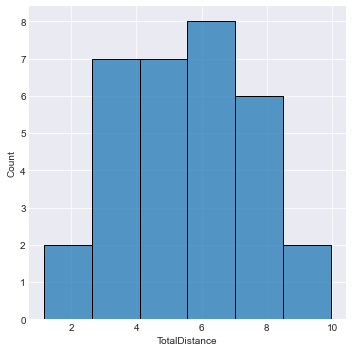

In [26]:
sns.displot(data=groupdf, x='TotalDistance')

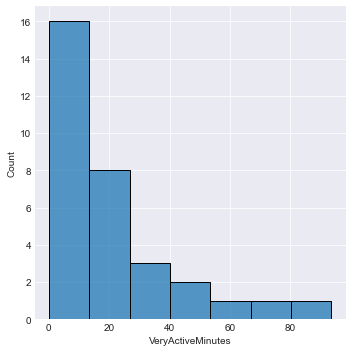

In [27]:
sns.displot(data=groupdf, x='VeryActiveMinutes')

Total Distance has a more normal distributive shape, while very active minutes has a heavily left skewed shape. 

Let's see distributions of caloric burning based on whether someone logged an above average distance or had above median very active minutes

In [28]:
print(groupdf.Calories.describe())
print(groupdf.TotalDistance.describe())
print(groupdf.VeryActiveMinutes.describe())

count      32.000000
mean     2344.944762
std       551.758143
min      1443.133333
25%      1909.559140
50%      2247.792570
75%      2777.916667
max      3469.678571
Name: Calories, dtype: float64
count    32.000000
mean      5.560514
std       2.169445
min       1.157059
25%       3.402581
50%       5.467505
75%       6.981911
max       9.973750
Name: TotalDistance, dtype: float64
count    32.000000
mean     20.764100
std      22.982576
min       0.096774
25%       3.562356
50%      12.241935
75%      25.970766
max      93.571429
Name: VeryActiveMinutes, dtype: float64


In [29]:
tempactdf = groupdf

In [30]:
tempactdf['AACal']=tempactdf['Calories'].isin(range(2344, 3500))
tempactdf.AACal.where(tempactdf.Calories < 2344, "True", inplace=True)
tempactdf['AADist']=tempactdf['TotalDistance'].isin(range(6, 10))
tempactdf.AADist.where(tempactdf.TotalDistance < 5.5, "True", inplace=True)
tempactdf['AAVerAct']=tempactdf['VeryActiveMinutes'].isin(range(21, 95))
tempactdf.AAVerAct.where(tempactdf.VeryActiveMinutes < 20.7, "True", inplace=True)

In [31]:
print(tempactdf['AACal'].value_counts())
print(tempactdf['AADist'].value_counts())
print(tempactdf['AAVerAct'].value_counts())

False    18
True     14
Name: AACal, dtype: int64
True     16
False    16
Name: AADist, dtype: int64
False    21
True     11
Name: AAVerAct, dtype: int64


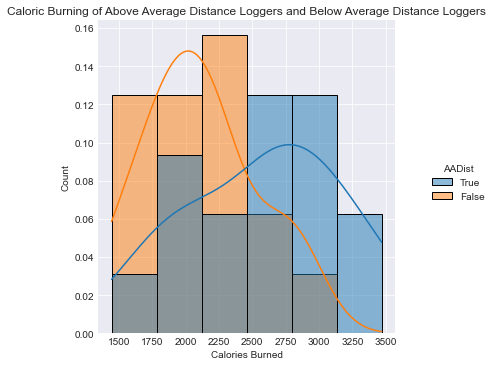

In [32]:
hist = sns.displot(x='Calories', kind='hist',
           data = tempactdf, hue='AADist',
                 alpha=0.5, stat='probability', kde=True)
hist.set_axis_labels("Calories Burned", "Count")
hist.set(title = "Caloric Burning of Above Average Distance Loggers and Below Average Distance Loggers")

This histogram shows that users who logged above average distance tended to burn significantly more calories than users who did not. 

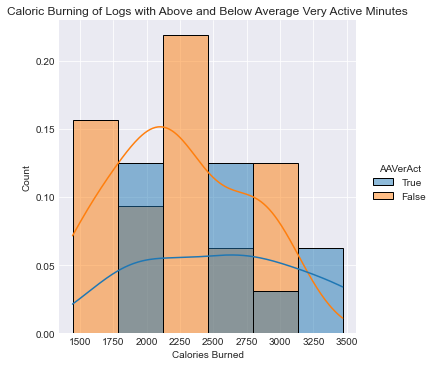

In [33]:
hist = sns.displot(x='Calories', kind='hist',
           data = tempactdf, hue='AAVerAct',
                 alpha=0.5, stat='probability', kde=True)
hist.set_axis_labels("Calories Burned", "Count")
hist.set(title='Caloric Burning of Logs with Above and Below Average Very Active Minutes')

It's a little bit more muddy for Very Active Minutes. The distribution of logs with above the average very active minutes is slightly higher than those with below it, but there's also a lot of overlap. The distance is certainly not as stark as with distance. 

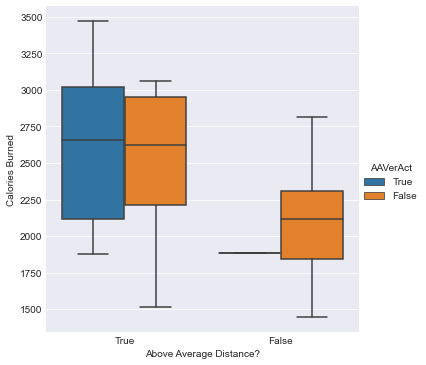

In [34]:
hist = sns.catplot(y='Calories', kind='box',
           data = tempactdf, hue='AAVerAct', x='AADist',)
                 #alpha=0.5) #stat='probability', kde=True)
hist.set_axis_labels("Above Average Distance?", "Calories Burned")


By overlapping these two categories, we see a few important things. 
1. Users who log above average distance perform much better overall than users who do not. 
2. There are almost no users who log below average distance and have above average very active minutes, which should perhaps be expected. 
3. And among users who log above average distance, users who also have above average very active minutes have much lower lows and higher highs, although it represents only a slight edge in the overall median. 

With that, I think we are ready to begin categorization for analysis. Based on this distribution, we will categorize them like this.

1. People who are below average in Total Distance will be classified as Low Activity Low Intensity
2. People who are below average in Total Distance and in the bottom 3 quartiles of Very Active Minutes will be High Activity Low Intensity
3. People who are above average in Total Distance and in the top quartile of Active Minutes will be High Activity High Intensity

The reason why I have chosen the 75th percentile as the dividing line between highly intensity and low intensity users is because of the huge leftward skew in the distribution. The average and the median don't really work to define someone as highly active. And I think 25 minutes of being very active is an entirely reasonable dividing line. 

In [35]:
groupdf['GUserType']="L" #assign a blank test category to all users

In [36]:
groupdf.loc[(groupdf.TotalDistance <5.5), 
       'GUserType'] = 'Low Activity Low Intensity'
groupdf.loc[(groupdf.TotalDistance >= 5.5)&(groupdf.VeryActiveMinutes <= 25), 
       'GUserType'] = 'High Activity Low Intensity'
groupdf.loc[(groupdf.TotalDistance >= 5.5)&(groupdf.VeryActiveMinutes > 25), 
       'GUserType'] = 'High Activity High Intensity'

In [37]:
groupdf['GUserType'].value_counts()

Low Activity Low Intensity      16
High Activity Low Intensity      8
High Activity High Intensity     8
Name: GUserType, dtype: int64

This looks like a reasonable set up for our distributions. 50% of users are below average in distance, and the other half of users are split between having high amounts of very active minutes and lower amounts. I think this will provide us with good categories to compare users by. 

In [38]:
groupdfmerge = groupdf[['GUserType','Id']] #select relevant columns to create a dataframe ready to merge
groupdfmerge

,GUserType,Id
0,High Activity High Intensity,1503960366
1,Low Activity Low Intensity,1624580081
2,Low Activity Low Intensity,1644430081
3,Low Activity Low Intensity,1844505072
4,Low Activity Low Intensity,1927972279
5,High Activity High Intensity,2022484408
6,Low Activity Low Intensity,2026352035
7,Low Activity Low Intensity,2320127002
8,High Activity Low Intensity,2347167796
9,Low Activity Low Intensity,2873212765


In [39]:
join_df = pd.merge(df, groupdfmerge, on='Id', how='inner') #perform an inner join on the original data set
join_df #our new data set contains all of our categorizations for users and their daily activity logs

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,GUserType
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366,High Activity High Intensity
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257,High Activity High Intensity
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222,High Activity High Intensity
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272,High Activity High Intensity
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267,High Activity High Intensity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,8877689391,2016-05-05,14055,10.67,10.67,0.0,5.46,0.82,4.37,0.0,67,15,188,1170,3052,Thursday,270,High Activity High Intensity
824,8877689391,2016-05-07,12332,8.13,8.13,0.0,0.08,0.96,6.99,0.0,105,28,271,1036,4142,Saturday,404,High Activity High Intensity
825,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.0,17,4,245,1174,2847,Sunday,266,High Activity High Intensity
826,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.0,18,11,224,1187,2832,Tuesday,253,High Activity High Intensity


# Double-Checking User Categorization. 
Now that we have our user categories merged back on to our daily activity log, let's look at an overview of different categories daily logs to make sure our categories are coherent.

Text(0.5, 1.0, 'Average Calories Burned By User Type')

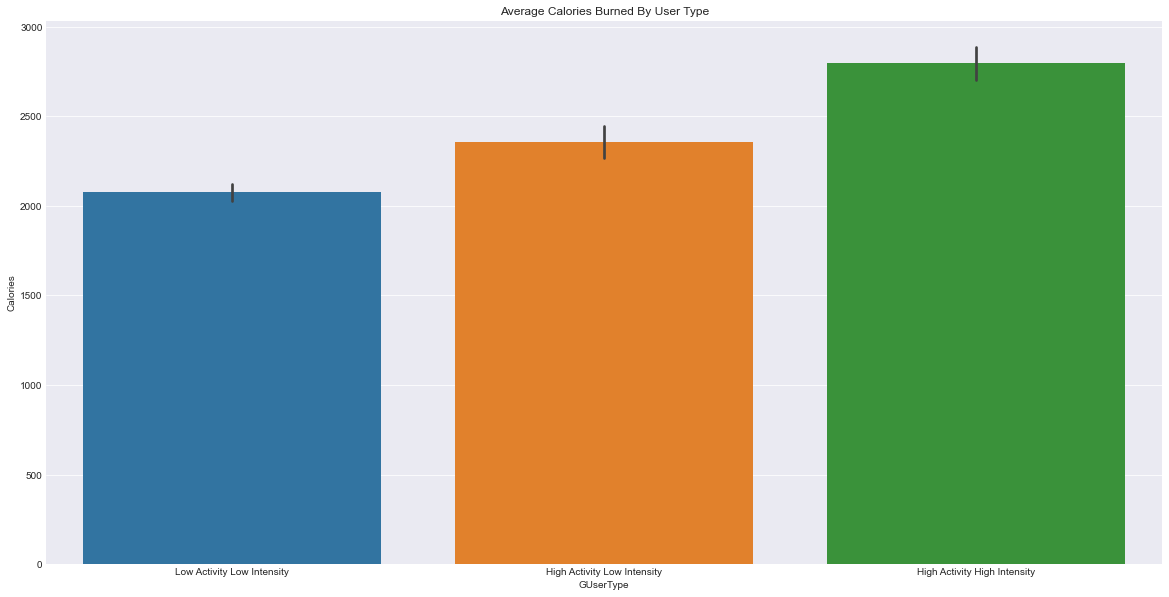

In [40]:
order1 = ['Low Activity Low Intensity', 'High Activity Low Intensity', 'High Activity High Intensity']
sns.barplot(data=join_df, x="GUserType", y="Calories", order=order1)
plt.title("Average Calories Burned By User Type")

Our categories show significant differences in terms of caloric burning outcomes. 

Text(0.5, 1.0, 'Distribution of Daily Calorie Burning By User Type')

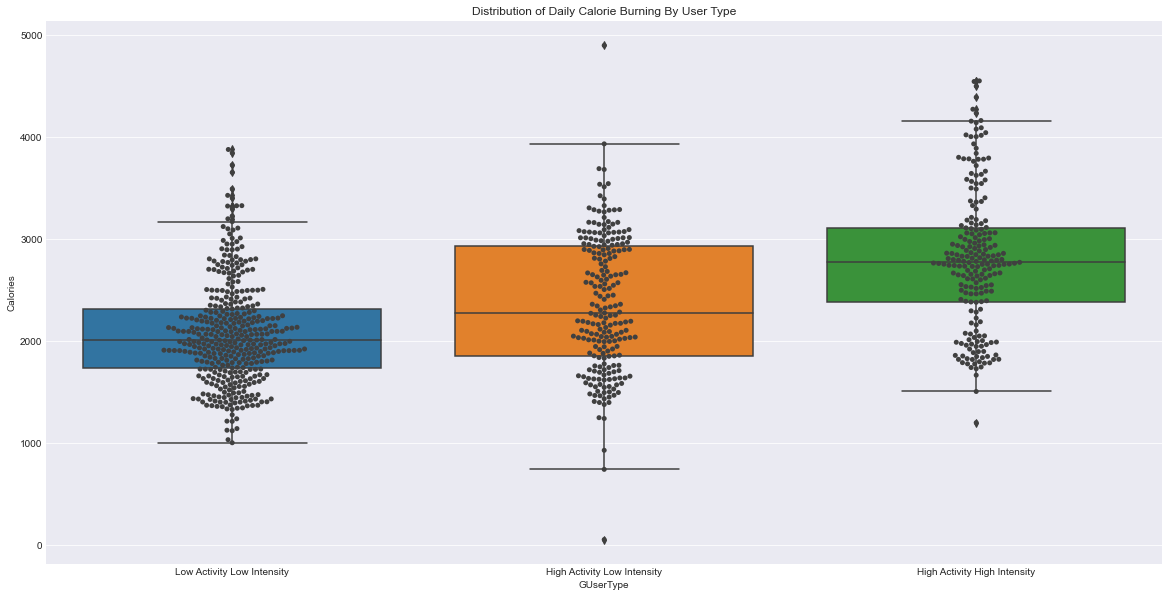

In [41]:
ax = sns.boxplot(x='GUserType', y='Calories', data=join_df, order=order1)
ax = sns.swarmplot(x="GUserType", y="Calories", data=join_df, color=".25", order=order1)
plt.title("Distribution of Daily Calorie Burning By User Type")

This scatter plot of all daily calorie burnings shows that beyond just the median, the ranges of caloric burning between users types seems significantly different. I think these categorizations will work very well. 

# Weekly Activity Analysis of Different groups

In [42]:
from pandas.api.types import CategoricalDtype

cat_day_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], # we want our days to be in order, so we create a specific ordering for the days
    ordered=True
)
g = join_df.groupby(['GUserType', 'DayOfTheWeek']).mean().reset_index() #average our different user types daily activities per each day of the week
g['DayOfTheWeek'] = g['DayOfTheWeek'].astype(cat_day_order) # set our week days to ascend and descend in the order we described earlier
g2_pivot = g.pivot_table(index='DayOfTheWeek', columns='GUserType', values='Calories', aggfunc=np.mean) #create a different pivot table for caloric burning

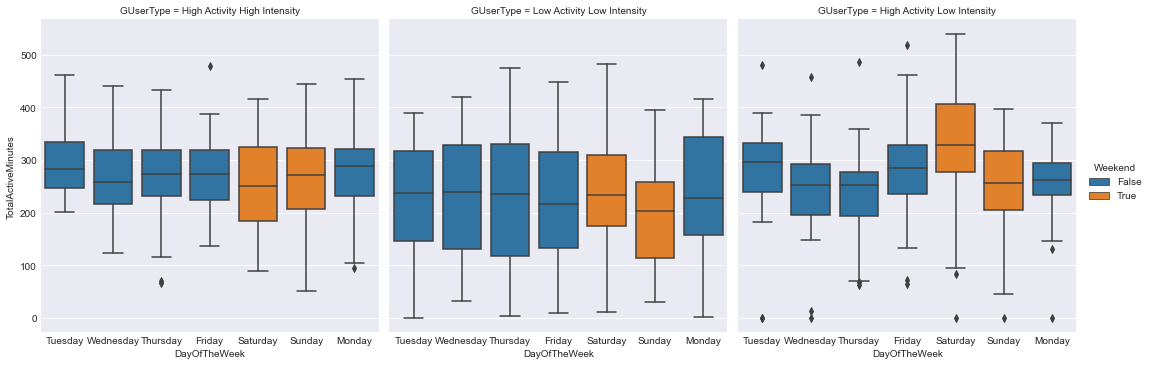

In [43]:
join_df['Weekend']=join_df['DayOfTheWeek'].isin(['Saturday', 'Sunday'])
sns.catplot(x='DayOfTheWeek', y="TotalActiveMinutes",col='GUserType', 
            hue='Weekend', data=join_df, kind="box", dodge=False)


High activity high intensity group is much more consistent in their total active minutes per day than their low intensity counter parts. 

Text(0.5, 1.0, 'Average Calories Burned Each Day of The Week by User Type')

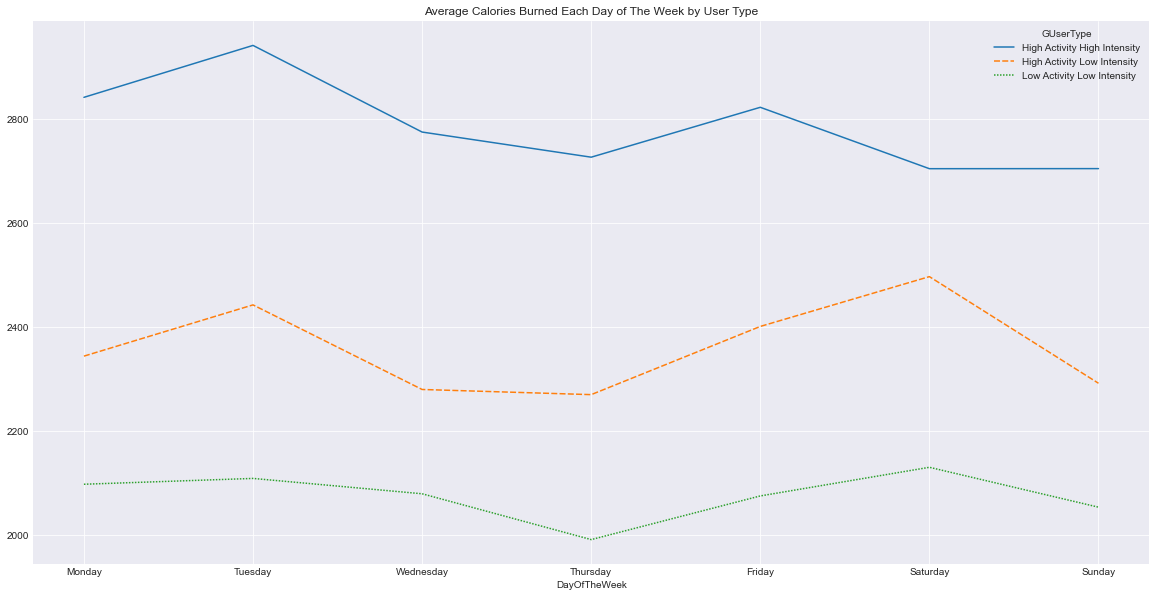

In [44]:
sns.lineplot(data=g2_pivot)

plt.title("Average Calories Burned Each Day of The Week by User Type")

The difference in daily caloric burn is notable. It's interesting that the daily consistency of High Act/High Int people is displayed here, and the higher activity on saturdays among high activity low intensity people is also shown. Saturdays have the lowest gap between the two groups.  

In [45]:
l = join_df.groupby(['GUserType']).mean().reset_index()
lp = l[['GUserType', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']]


lp

,GUserType,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,High Activity High Intensity,200.686916,18.471963,54.023364
1,High Activity Low Intensity,226.887387,23.927928,15.063063
2,Low Activity Low Intensity,209.760204,7.890306,6.709184


<AxesSubplot:ylabel='GUserType'>

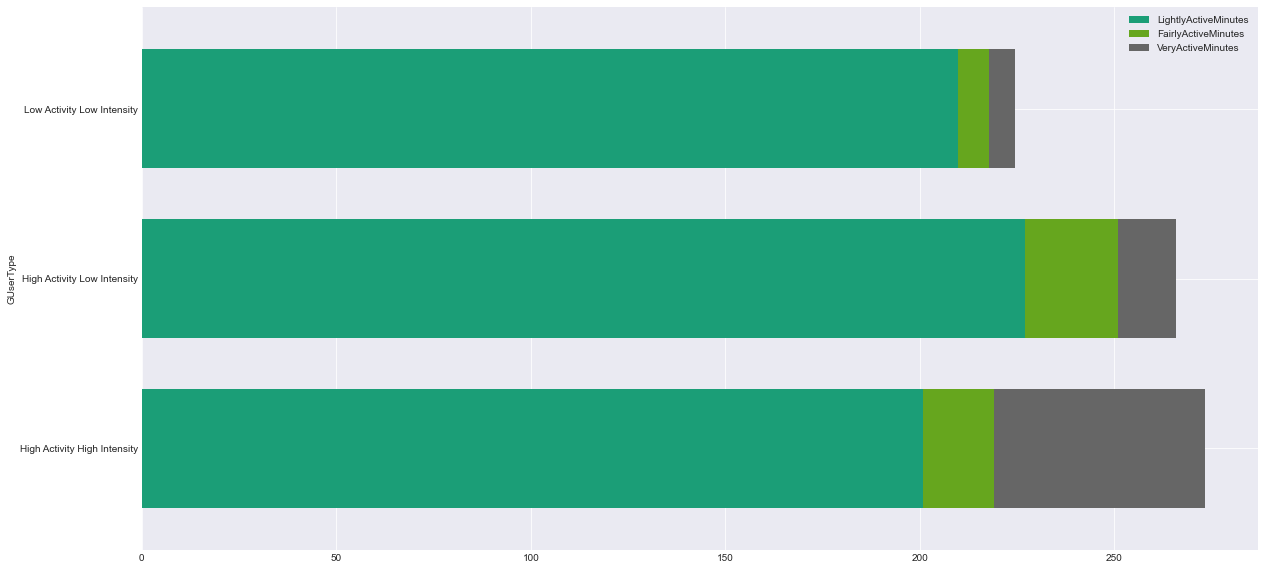

In [46]:
fig, ax = plt.subplots()
lp.plot(
    x='GUserType',
    kind = 'barh',
    stacked= True,
    mark_right= True,
    cmap='Dark2',
    width=0.7,
    ax=ax)

This is interesting, the difference in average active minutes between High Activity Low Intensity and High Act/High Int groups isn't too substantial, but the allocation is. And that produces big effects in caloric burning. 

# Part 2, analyzing hourly data.

In [47]:
hourcal_df = pd.read_csv('hourlyCalories_merged.csv') #import hourly calorie data
hourintens_df = pd.read_csv('hourlyIntensities_merged.csv') #import hourly activity intensity data
hoursteps_df = pd.read_csv('hourlySteps_merged.csv') #import hourly steps data

Now that we have imported all of our hourly data, let's make sure it's all fit to merge into one data set. 

In [48]:
print(hourcal_df.shape)
print(hourintens_df.shape)
print(hoursteps_df.shape)

(22099, 3)
(22099, 4)
(22099, 3)


In [49]:
print(hourcal_df.Id.value_counts())
print(hourintens_df.Id.value_counts())
print(hoursteps_df.Id.value_counts())

4558609924    736
2873212765    736
1624580081    736
2026352035    736
1927972279    736
2022484408    736
2320127002    735
8378563200    735
4388161847    735
8877689391    735
8053475328    735
4445114986    735
7086361926    733
6962181067    732
4020332650    732
4702921684    731
1844505072    731
5553957443    730
4319703577    724
8583815059    718
1503960366    717
5577150313    708
1644430081    708
3977333714    696
8792009665    672
6290855005    665
6117666160    660
6775888955    610
7007744171    601
3372868164    472
8253242879    431
2347167796    414
4057192912     88
Name: Id, dtype: int64
4558609924    736
2873212765    736
1624580081    736
2026352035    736
1927972279    736
2022484408    736
2320127002    735
8378563200    735
4388161847    735
8877689391    735
8053475328    735
4445114986    735
7086361926    733
6962181067    732
4020332650    732
4702921684    731
1844505072    731
5553957443    730
4319703577    724
8583815059    718
1503960366    717
55771

In [50]:
hourlydata_df = hourcal_df.merge(hourintens_df, on=['Id', 'ActivityHour'], how='left').merge(hoursteps_df, on=['Id', 'ActivityHour'], how='left')
hourlydata_df

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0
...,...,...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126,12,0.200000,514
22095,8877689391,5/12/2016 11:00:00 AM,192,29,0.483333,1407
22096,8877689391,5/12/2016 12:00:00 PM,321,93,1.550000,3135
22097,8877689391,5/12/2016 1:00:00 PM,101,6,0.100000,307


Great, now all of our hourly data is joined together. Let's make sure it's all clean and ready to use. 

In [51]:
hourlydata_df.drop(hourlydata_df[hourlydata_df['Id']==4057192912].index, inplace=True)

In [52]:
hourlydata_df.drop_duplicates()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0
...,...,...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126,12,0.200000,514
22095,8877689391,5/12/2016 11:00:00 AM,192,29,0.483333,1407
22096,8877689391,5/12/2016 12:00:00 PM,321,93,1.550000,3135
22097,8877689391,5/12/2016 1:00:00 PM,101,6,0.100000,307


In [53]:
for col in hourlydata_df.columns:
    pct_missing = np.mean(hourlydata_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Id - 0.0%
ActivityHour - 0.0%
Calories - 0.0%
TotalIntensity - 0.0%
AverageIntensity - 0.0%
StepTotal - 0.0%


In [54]:
hourlydata_df['ActivityHour']=pd.to_datetime(hourlydata_df['ActivityHour']) #make sure our activity time is formatted as pd datetime
hourlydata_df['Hour'] = hourlydata_df['ActivityHour'].dt.hour #create a separate hour column for categorization
#create a standard m-dd date format for plotting
hourlydata_df['Day'] = hourlydata_df['ActivityHour'].dt.day 
hourlydata_df['Month']=hourlydata_df['ActivityHour'].dt.month
hourlydata_df['Date'] = hourlydata_df.Month.astype(str) +'-'+ hourlydata_df.Day.astype(str)
#create a column that tells us the day of the week 
hourlydata_df['DayOfTheWeek'] = hourlydata_df["ActivityHour"].dt.day_name()
#drop excess rows
hourlydata_df = hourlydata_df.drop(['Day','Month'],axis=1)
#define if a certain time took place on a weekend or in normal day time hours (6AM - 10PM) for easy access
hourlydata_df['Weekend']=hourlydata_df['DayOfTheWeek'].isin(['Saturday', 'Sunday'])
hourlydata_df['DayTime']=hourlydata_df['Hour'].isin(range(6,22))
#display the new dataframe
hourlydata_df

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,Hour,Date,DayOfTheWeek,Weekend,DayTime
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,0,4-12,Tuesday,False,False
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,1,4-12,Tuesday,False,False
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,2,4-12,Tuesday,False,False
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,3,4-12,Tuesday,False,False
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,4,4-12,Tuesday,False,False
...,...,...,...,...,...,...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,12,0.200000,514,10,5-12,Thursday,False,True
22095,8877689391,2016-05-12 11:00:00,192,29,0.483333,1407,11,5-12,Thursday,False,True
22096,8877689391,2016-05-12 12:00:00,321,93,1.550000,3135,12,5-12,Thursday,False,True
22097,8877689391,2016-05-12 13:00:00,101,6,0.100000,307,13,5-12,Thursday,False,True


Now that that's all nice and tidy, let's merge our user categories onto the data set so that we can begin our analysis

In [55]:
hourlydata_df = pd.merge(hourlydata_df, groupdfmerge, on='Id', how='inner')
hourlydata_df

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,Hour,Date,DayOfTheWeek,Weekend,DayTime,GUserType
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,0,4-12,Tuesday,False,False,High Activity High Intensity
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,1,4-12,Tuesday,False,False,High Activity High Intensity
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,2,4-12,Tuesday,False,False,High Activity High Intensity
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,3,4-12,Tuesday,False,False,High Activity High Intensity
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,4,4-12,Tuesday,False,False,High Activity High Intensity
...,...,...,...,...,...,...,...,...,...,...,...,...
22006,8877689391,2016-05-12 10:00:00,126,12,0.200000,514,10,5-12,Thursday,False,True,High Activity High Intensity
22007,8877689391,2016-05-12 11:00:00,192,29,0.483333,1407,11,5-12,Thursday,False,True,High Activity High Intensity
22008,8877689391,2016-05-12 12:00:00,321,93,1.550000,3135,12,5-12,Thursday,False,True,High Activity High Intensity
22009,8877689391,2016-05-12 13:00:00,101,6,0.100000,307,13,5-12,Thursday,False,True,High Activity High Intensity


In [56]:
#Group the dataframe by user type, hour and day of the week
hourg = hourlydata_df.groupby(['GUserType','ActivityHour','DayOfTheWeek']).mean().reset_index()
#order the days of the week
hourg['DayOfTheWeek'] = hourg['DayOfTheWeek'].astype(cat_day_order)

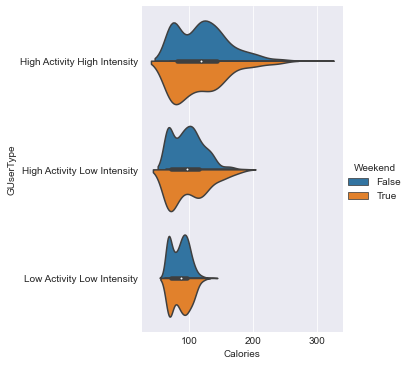

In [57]:
sns.catplot(y='GUserType', x='Calories', hue='Weekend',
           kind='violin', split=True,
           data=hourg)

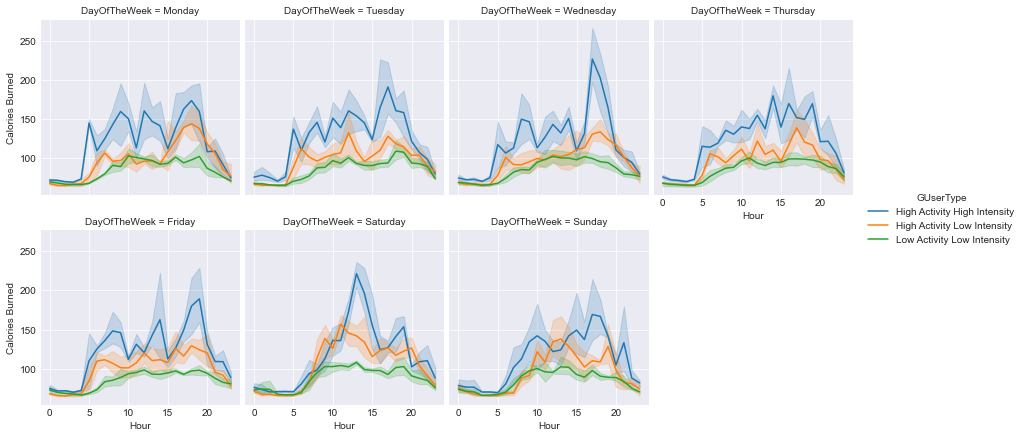

In [58]:
g=sns.FacetGrid(hourg, col='DayOfTheWeek', hue='GUserType', col_wrap=4, margin_titles=True, despine=False)
g.map_dataframe(sns.lineplot, x='Hour', y='Calories')
g.set_axis_labels("Hour", "Calories Burned")
g.fig.subplots_adjust(wspace=0, hspace=0)
g.add_legend()
g.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Text(0.5, 1.0, 'Hourly Calories Burned vs Hourly Intensity ')

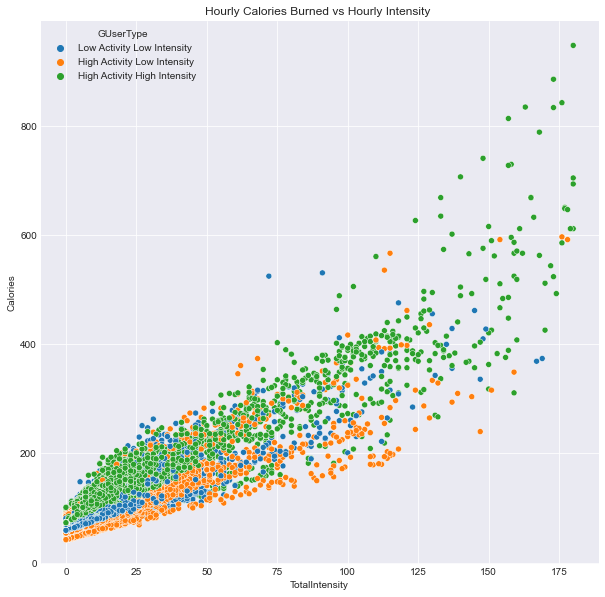

In [59]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(
    data=hourlydata_df,
    x='TotalIntensity', y='Calories',
    hue='GUserType', ci=None,
    hue_order=order1, ax=ax)
plt.title("Hourly Calories Burned vs Hourly Intensity ")

In [60]:
avg_hour_int = hourlydata_df.groupby(['GUserType', 'Hour'])['TotalIntensity'].mean().reset_index()
avg_hour_int.head()

,GUserType,Hour,TotalIntensity
0,High Activity High Intensity,0,2.178423
1,High Activity High Intensity,1,1.595833
2,High Activity High Intensity,2,1.145833
3,High Activity High Intensity,3,0.329167
4,High Activity High Intensity,4,1.104167


In [61]:
highhourfinder = hourlydata_df.groupby(['Hour'])['TotalIntensity'].mean().reset_index()

In [62]:
highhourfinder.sort_values(['TotalIntensity'], ascending=False)

,Hour,TotalIntensity
18,18,21.955703
17,17,21.714286
19,19,21.420819
12,12,19.912854
14,14,18.931298
13,13,18.816794
16,16,17.744469
10,10,17.707027
11,11,16.959913
15,15,15.638858


In [63]:
avg_cal_burn = hourlydata_df.groupby(['GUserType', 'Hour'])['Calories'].mean().reset_index()
avg_cal_burn.head()

,GUserType,Hour,Calories
0,High Activity High Intensity,0,75.809129
1,High Activity High Intensity,1,74.195833
2,High Activity High Intensity,2,72.966667
3,High Activity High Intensity,3,70.558333
4,High Activity High Intensity,4,73.425000


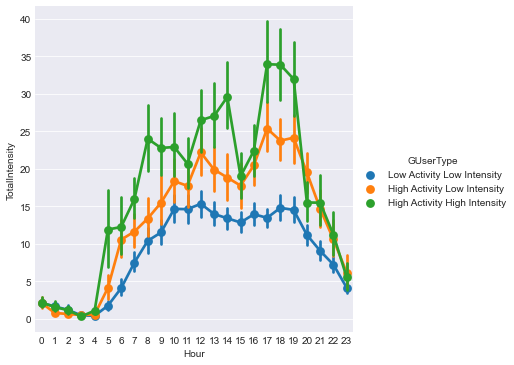

In [64]:
sns.catplot(data=hourlydata_df, x='Hour', y='TotalIntensity',
           hue='GUserType', kind='point', hue_order=order1)

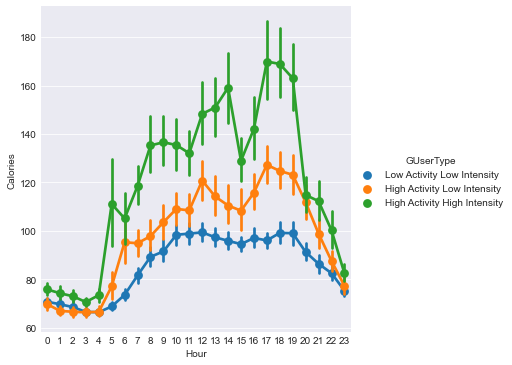

In [65]:
sns.catplot(data=hourlydata_df, x='Hour', y='Calories',
           hue='GUserType', kind='point', hue_order=order1)

Text(0.5, 1.0, 'Average Intensity vs. Average Calories Burned Every Hour')

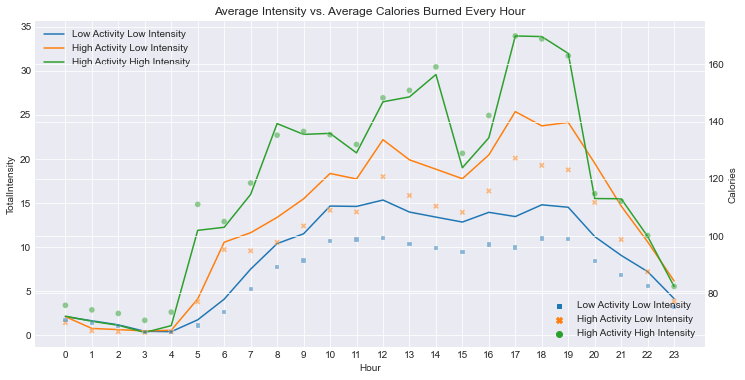

In [66]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=avg_hour_int, x='Hour', y='TotalIntensity', hue='GUserType',
             hue_order=order1, ax=ax1)
ax1.legend(loc="upper left")


ax2=ax1.twinx()
sns.scatterplot(data=avg_cal_burn, ax=ax2, x='Hour', y='Calories', hue='GUserType',
           alpha=.5, style='GUserType', hue_order=order1)

ax2.legend(loc="lower right")
plt.xticks(np.arange(0, 24, 1))
plt.title('Average Intensity vs. Average Calories Burned Every Hour')

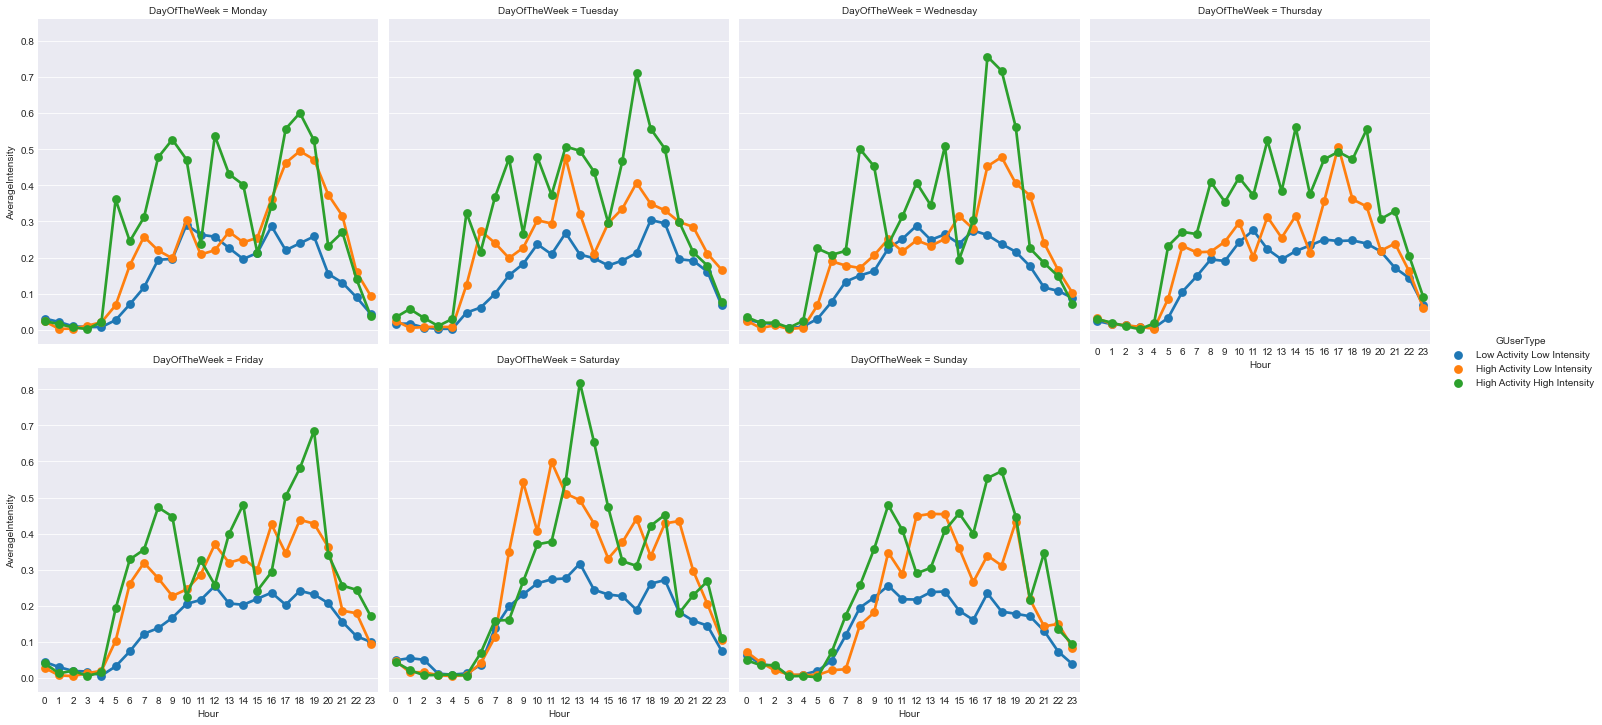

In [67]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.catplot(x='Hour', y='AverageIntensity', hue='GUserType',
                hue_order = order1, data=hourlydata_df, col_wrap = 4,
                 col='DayOfTheWeek', kind='point', col_order = day_order,
                 ci=None
               )

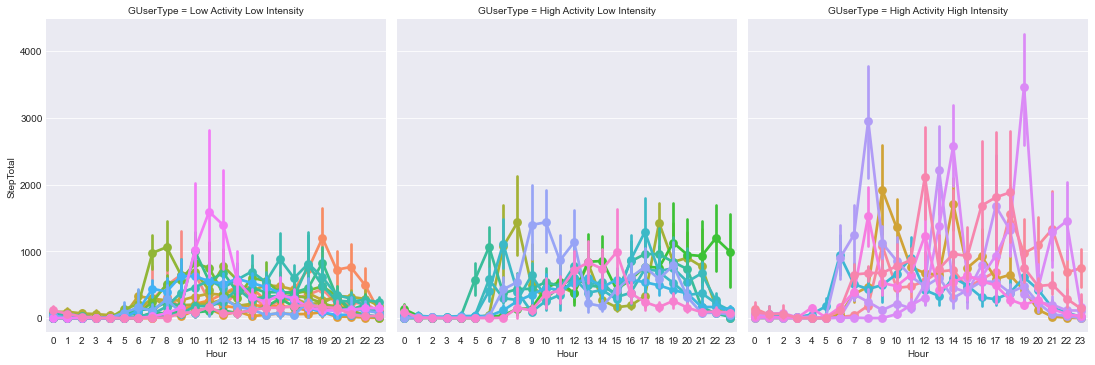

In [68]:
ax = sns.catplot(x='Hour', y='StepTotal', hue='Id', data=hourlydata_df, col_wrap = 4,
                 col='GUserType', col_order=order1, kind='point',
                  legend=False, alpha=0.7
               )

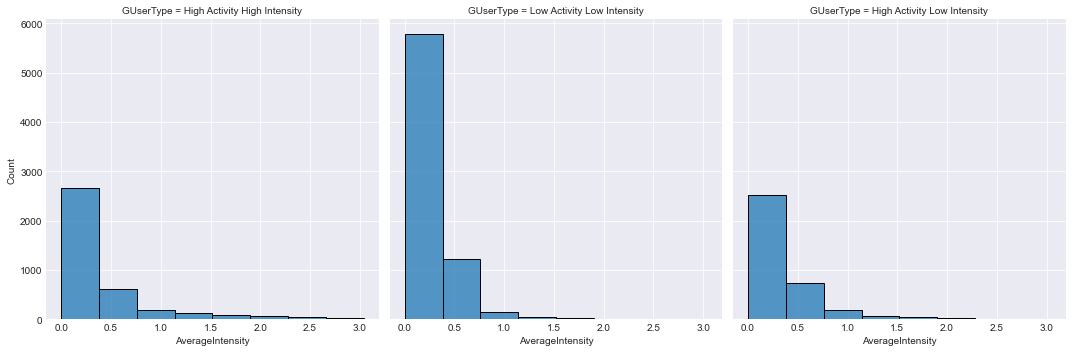

In [69]:
sns.displot(
    hourlydata_df.query("DayTime == True"), x='AverageIntensity', col='GUserType', 
    binwidth=0.38, multiple='stack')

In [70]:
hourlydata_df['ActivityLevel'] = pd.cut(hourlydata_df.AverageIntensity, bins=[0, .1, .27, .38, .6, 1, 3], labels=['Low Activity', 
                                                                                                            'Moderate Activity', 'Medium Activity','Above Medium Activity',
                                                                                                            'High Activity', 'Very High Activity'])

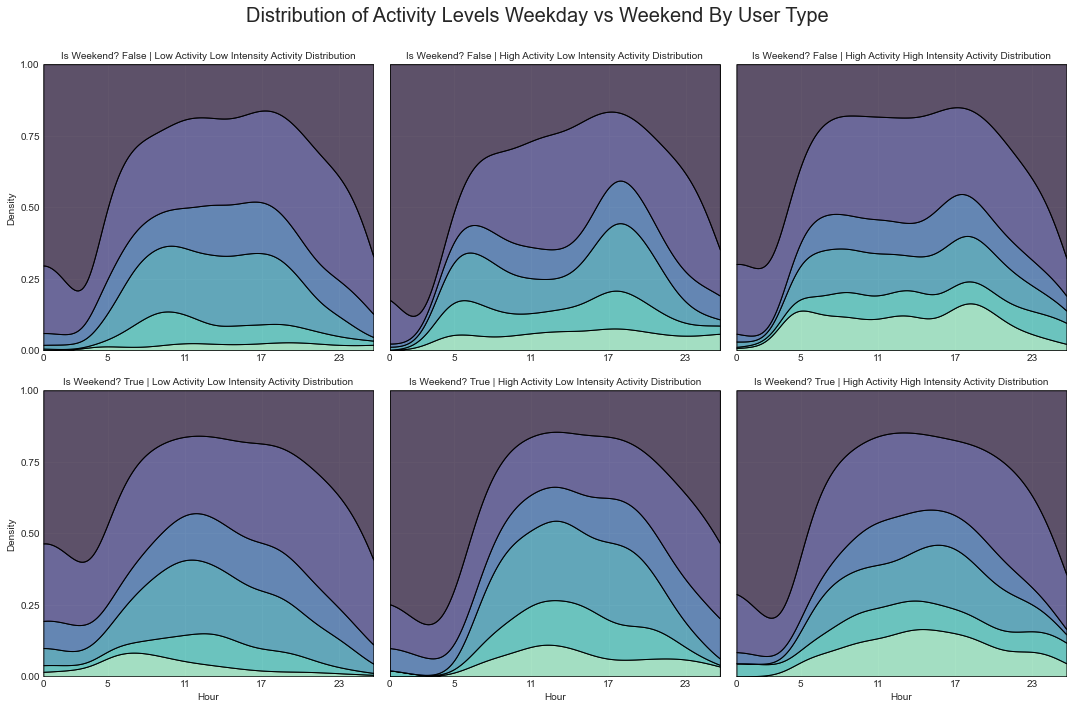

In [71]:
dsp = sns.displot(data = hourlydata_df, x='Hour',
                  col='GUserType', row='Weekend', multiple='fill',
                hue='ActivityLevel', kind='kde', clip=(0,None),
                  palette="mako", legend=False,
                 facet_kws={'col_order': order1,  'sharex': False}, #this passes keyword functions to the facet grid, for some reason it wouldn't work in the displot
                 ) 

dsp.set_titles("Is Weekend? {row_name} | {col_name} Activity Distribution") #make the titles a bit more readable
dsp.set(xticks=[0, 5, 11, 17, 23], yticks=[0,0.25, 0.5,0.75, 1])   
sns.set_context("paper")
dsp.tight_layout()
dsp.fig.suptitle('Distribution of Activity Levels Weekday vs Weekend By User Type', size = 20)
dsp.fig.subplots_adjust(top=.9, wspace=.05, hspace=.14)
dsp.despine(left=False)


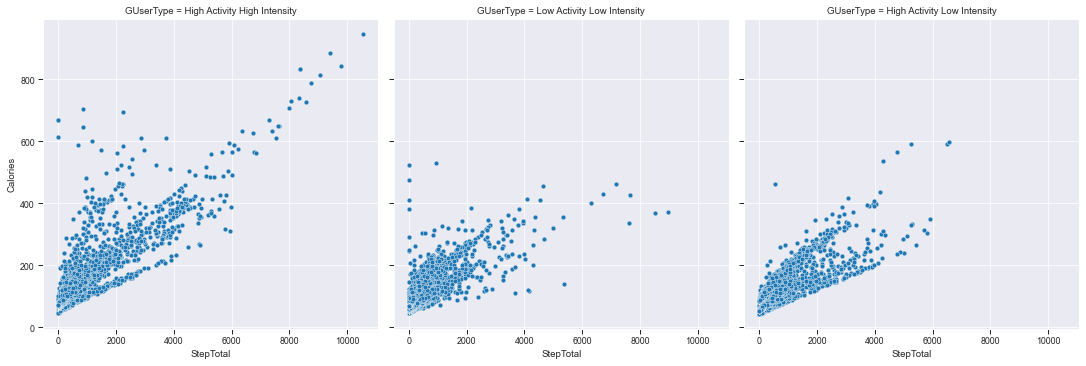

In [72]:
sns.relplot(data=hourlydata_df, x='StepTotal', y='Calories', col='GUserType')

In [73]:
StepActLvl = hourlydata_df.groupby(['GUserType','ActivityLevel'])['StepTotal'].sum().reset_index()

In [74]:
StepActLvl

,GUserType,ActivityLevel,StepTotal
0,High Activity High Intensity,Low Activity,67169
1,High Activity High Intensity,Moderate Activity,356392
2,High Activity High Intensity,Medium Activity,237759
3,High Activity High Intensity,Above Medium Activity,414592
4,High Activity High Intensity,High Activity,395457
5,High Activity High Intensity,Very High Activity,1308111
6,High Activity Low Intensity,Low Activity,55249
7,High Activity Low Intensity,Moderate Activity,250772
8,High Activity Low Intensity,Medium Activity,199379
9,High Activity Low Intensity,Above Medium Activity,445736


Text(0, 0.5, '')

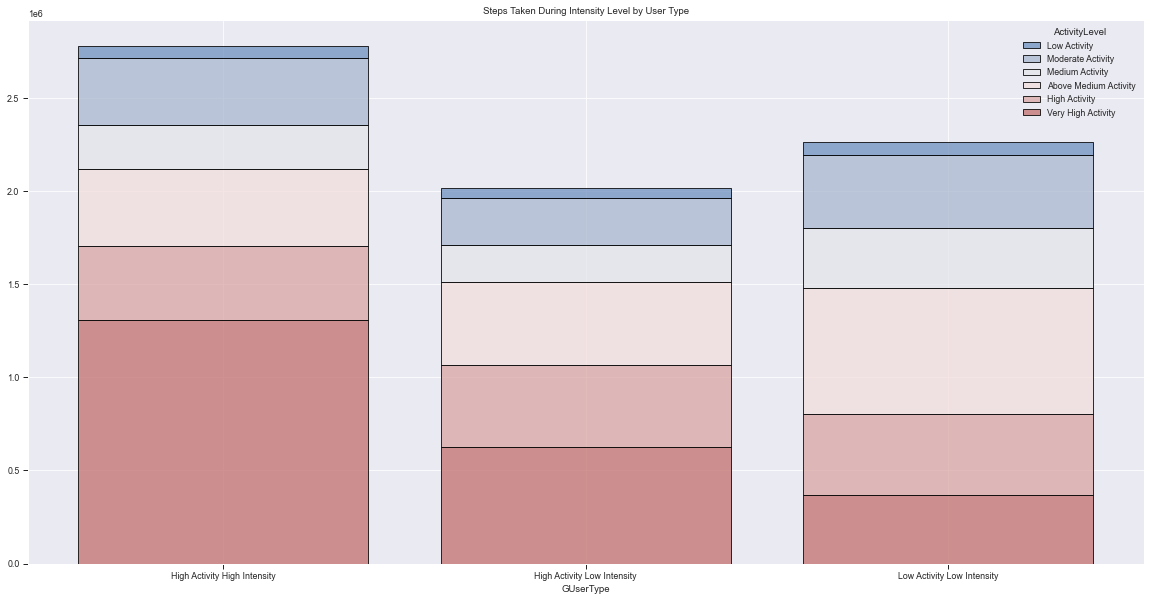

In [75]:
ax = sns.histplot(
    StepActLvl,
    x='GUserType',
    weights='StepTotal',
    hue='ActivityLevel',
    multiple='stack',
    palette='vlag',
    # Add white borders to the bars.
    #edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Steps Taken During Intensity Level by User Type')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

In [76]:
sleep_df = pd.read_csv("sleepDay_merged.csv")